In [2]:
import py21cmfast as p21c
from py21cmfast import plotting
import os, sys
import glob
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt


%matplotlib inline

import corner

sys.path.append('../')
import py21cmfish as p21fish


print(f"21cmFAST version is {p21c.__version__}")

plt.style.use(['default','seaborn','seaborn-ticks'])
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['figure.figsize'] = (4,3)
mpl.rcParams['figure.dpi'] = 150

from matplotlib import rc_file
rc_file(os.environ['WORK_DIR']+'/code/matplotlibrc')

import matplotlib.mathtext as mathtext
mathtext.FontConstantsBase.sup1 = 0.5
mathtext.FontConstantsBase.sub1 = 0.2
mathtext.FontConstantsBase.sub2 = 0.2

21cmFAST version is 3.0.4.dev248+g3334c13


In [3]:
%load_ext autoreload
%autoreload 2

# 21cmfish examples

In [6]:
data_dir = '../'
old_dir = '../../21cmFAST-ethos-analysis/21cmFAST_notebooks/'

# CDM fiducial

In [7]:
output_dir = old_dir+'_cache/big_box/fisher/EoS_mini/'

astro_params_vary, astro_params_fid = p21fish.get_params_fid(config_file=data_dir+'21cmFAST_config_files/EoS_mini.config')

In [8]:
params_EoS = {}
for param in astro_params_vary:
    params_EoS[param] = p21fish.Parameter(param=param, 
                                          output_dir=output_dir, 
                                          PS_err_dir='_cache/21cmSense/21cmSense_fid/',
                                          clobber=False, Park19=None)

########### fisher set up for ALPHA_STAR
    Loaded redshifts
    Loaded redshifts
    Loaded T(z) from ../../21cmFAST-ethos-analysis/21cmFAST_notebooks/_cache/big_box/fisher/EoS_mini/global_signal_dict_ALPHA_STAR.npy
    Loaded param values from ../../21cmFAST-ethos-analysis/21cmFAST_notebooks/_cache/big_box/fisher/EoS_mini/params_dict_ALPHA_STAR.npy
    Loaded PS from ../../21cmFAST-ethos-analysis/21cmFAST_notebooks/_cache/big_box/fisher/EoS_mini/power_spectrum_dict_ALPHA_STAR.npy


AttributeError: Path to 21cmsense errors: _cache/21cmSense/21cmSense_fid/ does not exist/cannot be found - check your path

## Fisher

PS shape: (20, 24)
generating new axis


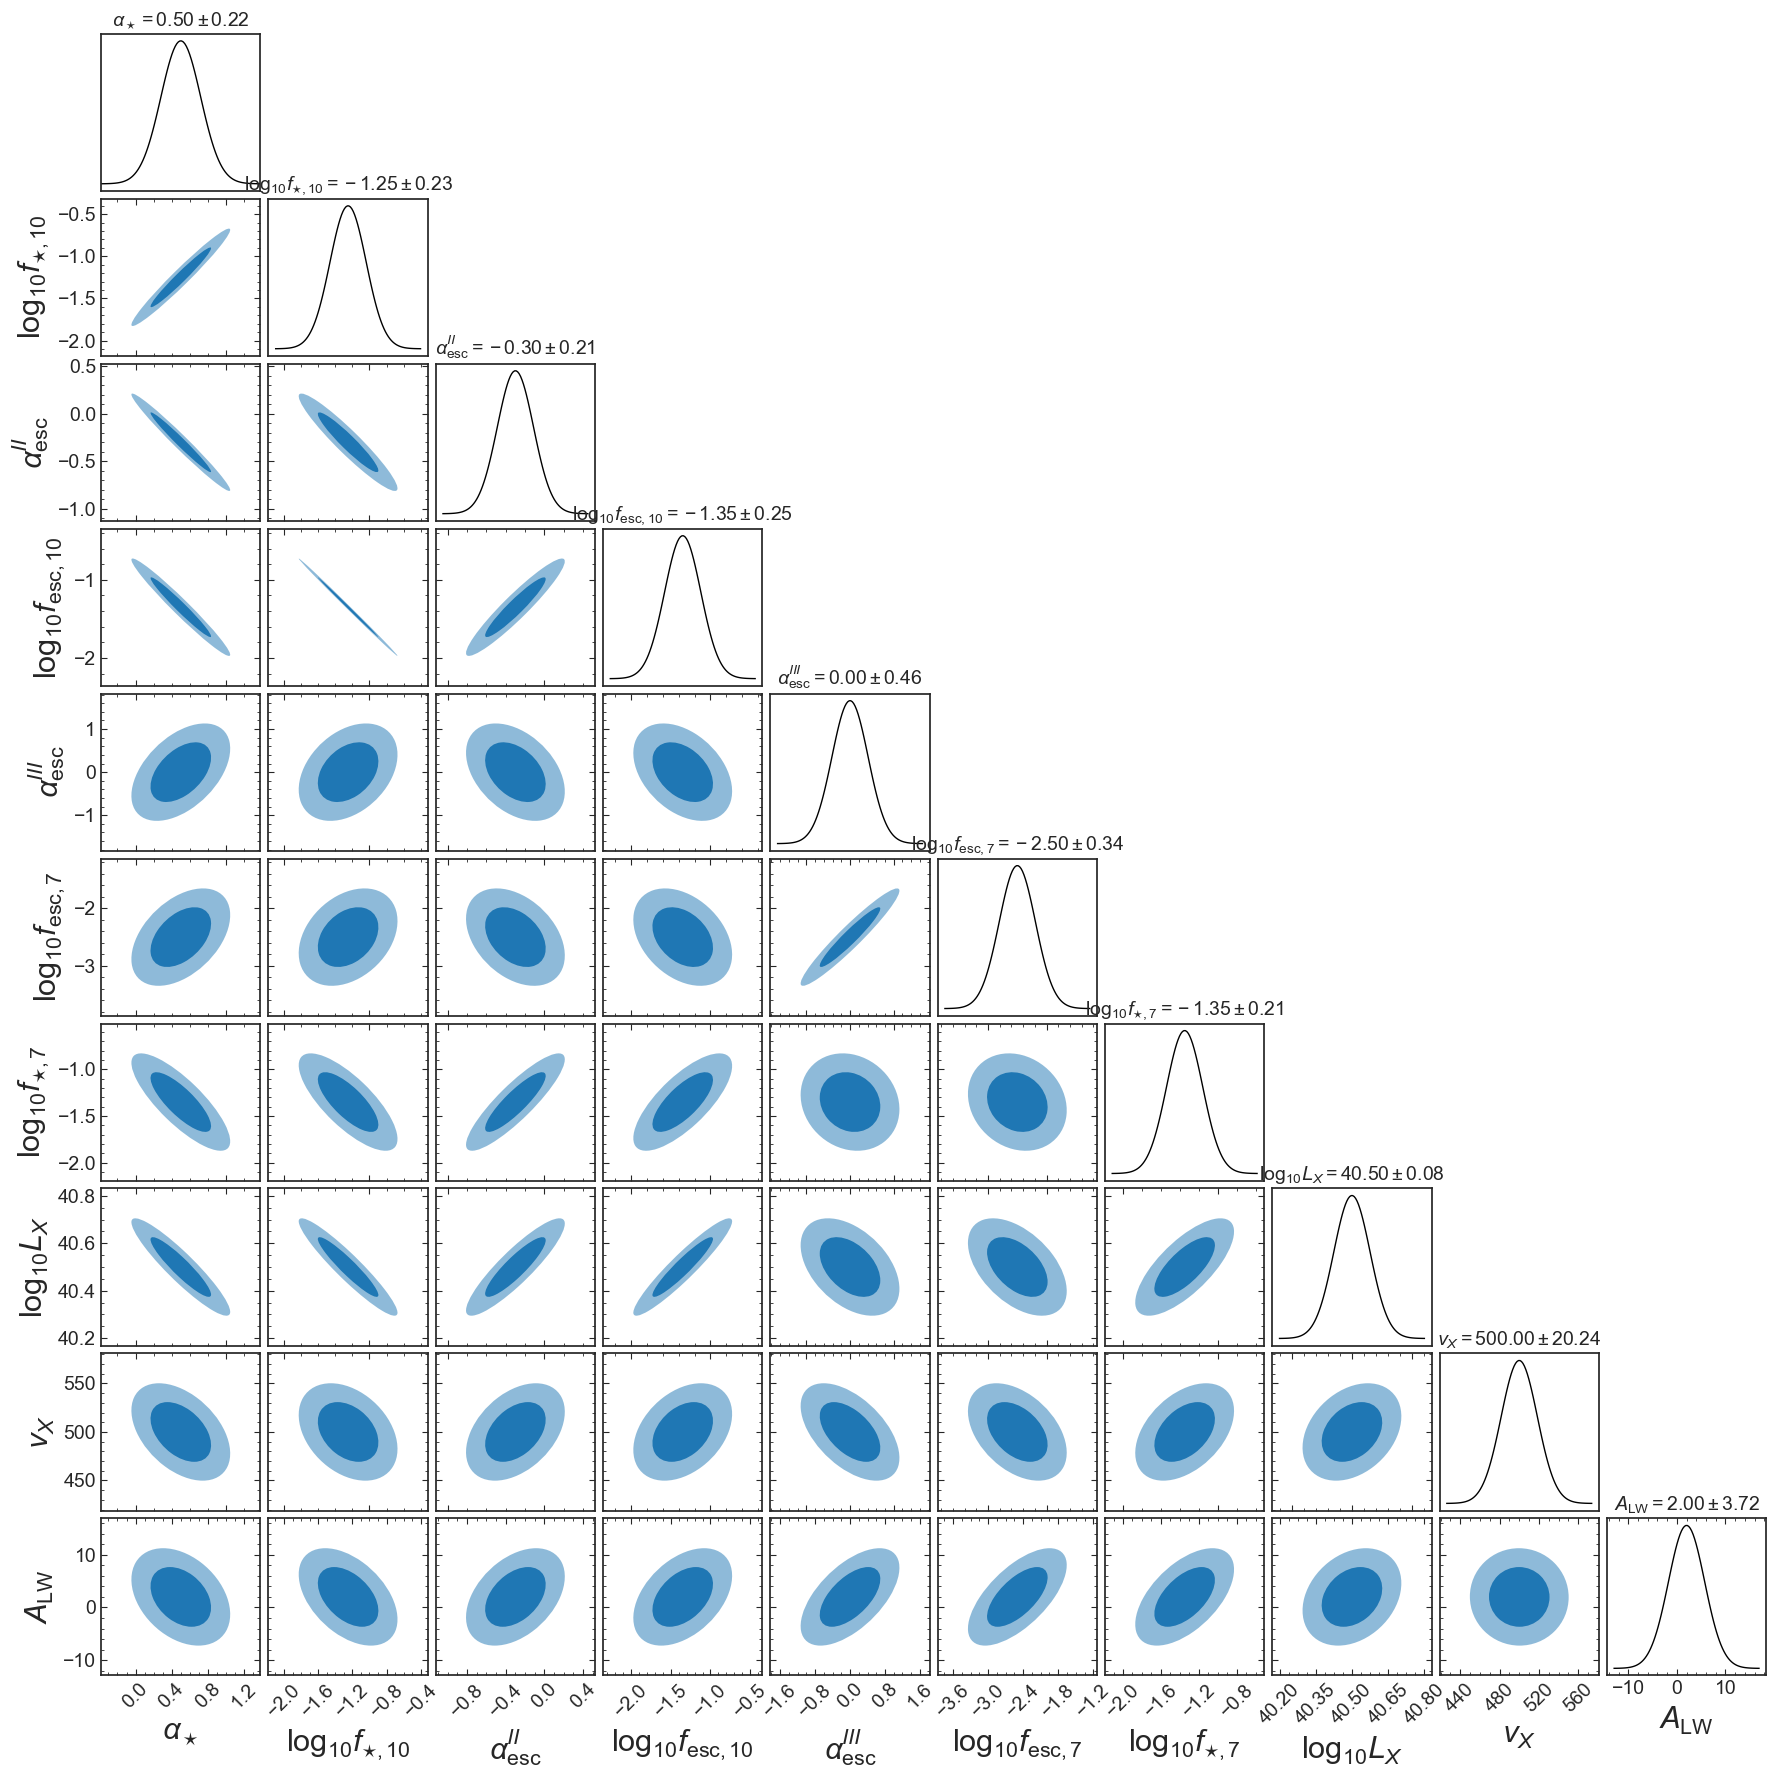

In [7]:
Fij_matrix_PS, Finv_PS = p21fish.make_fisher_matrix(params_EoS, fisher_params=astro_params_vary, 
                                                 hpeak=0.0, obs='PS',
                                                 k_min=0.1, k_max=1, 
                                                 z_min=5.7, z_max=30., 
                                                 sigma_mod_frac=0.2,
                                                    cosmo_key='CDM',
                                                add_sigma_poisson=True) 

fid_params = np.array([astro_params_fid[param] for param in params_EoS])
fid_labels = np.array([p21fish.astro_params_labels[param] for param in params_EoS])

p21fish.plot_triangle(params=astro_params_vary, 
                      fiducial=fid_params,
                      labels=fid_labels,
                      cov=Finv_PS,
                      title_fontsize=14,
                      xlabel_kwargs={'labelpad': 5, 'fontsize':22},
                      ylabel_kwargs={'labelpad': 5, 'fontsize':22},
                      fig_kwargs={'figsize':(18,18)});

plt.savefig('../figs/corner_EoS_mini_fisher.png', bbox_inches='tight')

# Comparison to Park+19

In [10]:
output_dir_Park19 = data_dir+'examples/Park19/'
astro_params_vary_Park19, astro_params_fid_Park19 = p21fish.get_params_fid(config_file=data_dir+'21cmFAST_config_files/Park19.config')

# Reorder to match Park+19
astro_params_vary_Park19 = ['F_STAR10', 'ALPHA_STAR',
                             'F_ESC10', 'ALPHA_ESC', 
                             'M_TURN', 't_STAR', 
                             'L_X', 'NU_X_THRESH']

In [11]:
params_Park19 = {}
for param in astro_params_vary_Park19:
        
    params_Park19[param] = p21fish.Parameter(param=param, 
                                             output_dir=output_dir_Park19,
                                             HII_DIM=128, BOX_LEN=250,
                                             min_redshift=5.9,
                                             PS_err_dir='_cache/21cmSense/errors_like_Park19/',
                                             clobber=False, Park19='real')

########### fisher set up for F_STAR10
    Loaded redshifts
    Loaded redshifts
    Loaded T(z) from ../../21cmfish/examples/Park19/global_signal_dict_F_STAR10.npy
    Loaded param values from ../../21cmfish/examples/Park19/params_dict_F_STAR10.npy
    Loaded PS from ../../21cmfish/examples/Park19/power_spectrum_dict_F_STAR10_Park19.npy
    Loading 21cmsense errors from _cache/21cmSense/errors_like_Park19/
    Loaded PS_z_HERA from ../../21cmfish/examples/Park19/PS_z_HERA_Park19.npy shape= (12,)
    Loaded GS derivatives from ../../21cmfish/examples/Park19/global_signal_deriv_dict_F_STAR10.npy
    Loaded PS derivatives from ../../21cmfish/examples/Park19/power_spectrum_deriv_dict_F_STAR10_Park19.npy shape= (12, 30)
########### fisher set up for ALPHA_STAR
    Loaded redshifts
    Loaded redshifts
    Loaded T(z) from ../../21cmfish/examples/Park19/global_signal_dict_ALPHA_STAR.npy
    Loaded param values from ../../21cmfish/examples/Park19/params_dict_ALPHA_STAR.npy
    Loaded PS from

PS shape: (12, 23)
generating new axis


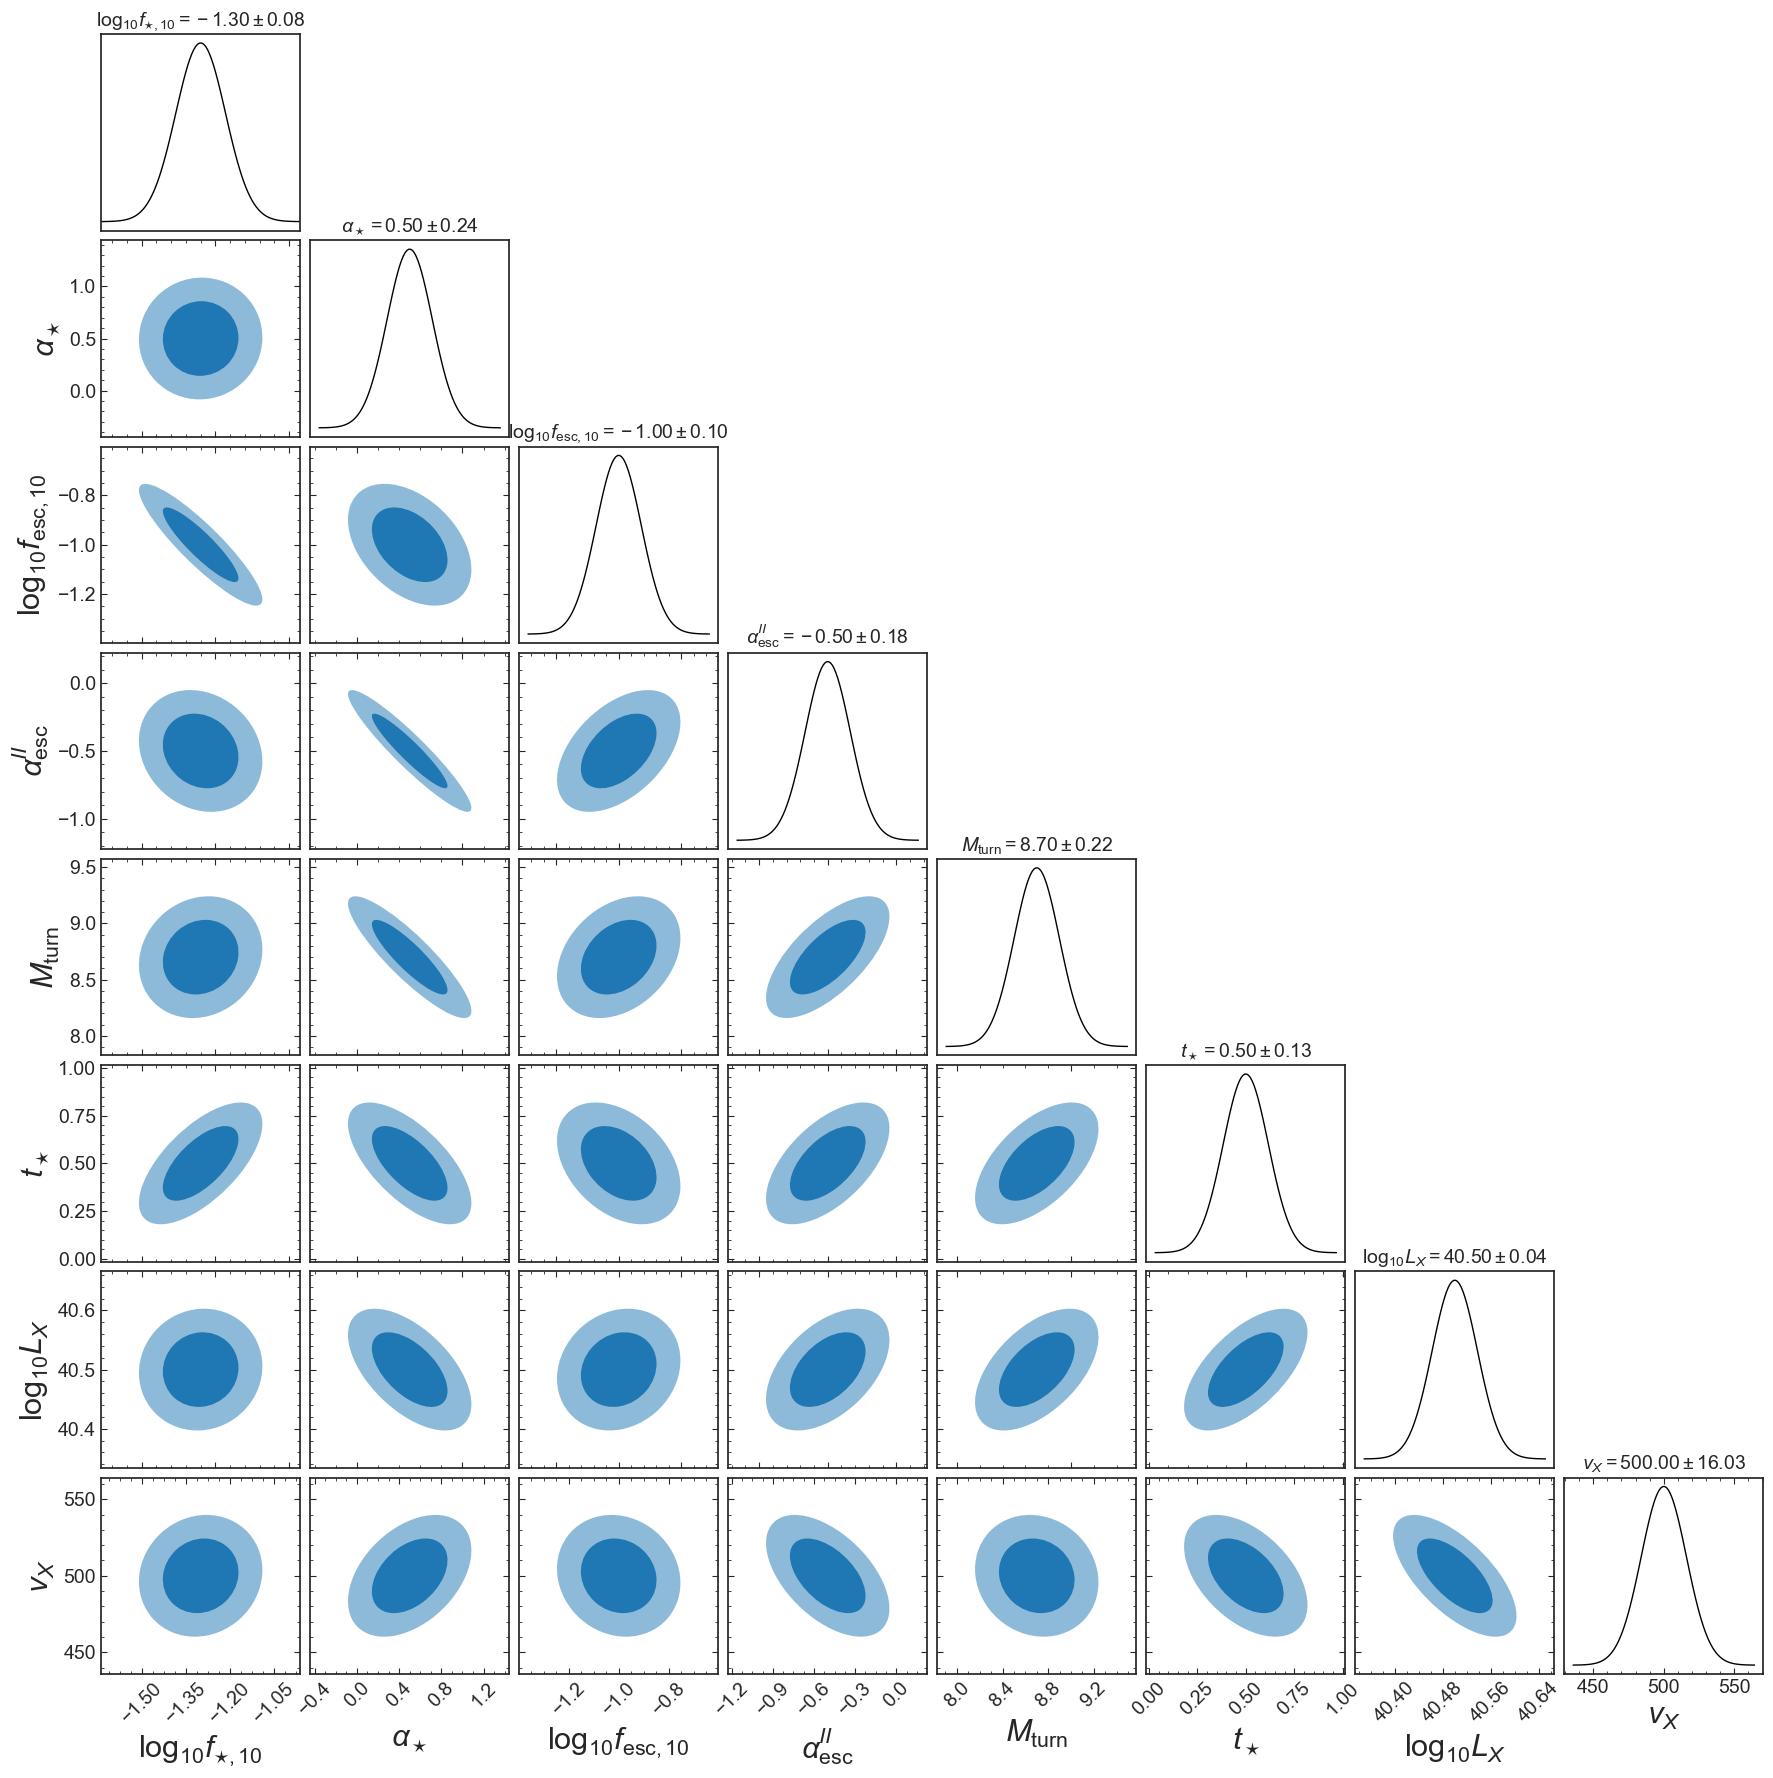

In [12]:
Fij_matrix_PS_Park19, Finv_PS_Park19 = p21fish.make_fisher_matrix(params_Park19, 
                                                                fisher_params=astro_params_vary_Park19, 
                                                                hpeak=0.0, obs='PS',
                                                                k_min=0.1, k_max=1, 
                                                                z_min=5.7, z_max=30., 
                                                                sigma_mod_frac=0.2,
                                                                cosmo_key='CDM',
                                                                add_sigma_poisson=True) 

fid_params_Park19 = np.array([astro_params_fid_Park19[param] for param in params_Park19])
fid_labels_Park19 = np.array([p21fish.astro_params_labels[param] for param in params_Park19])

p21fish.plot_triangle(params=astro_params_vary_Park19, 
                      fiducial=fid_params_Park19,
                      labels=fid_labels_Park19,
                      cov=Finv_PS_Park19,
                      title_fontsize=14,
                      xlabel_kwargs={'labelpad': 5, 'fontsize':22},
                      ylabel_kwargs={'labelpad': 5, 'fontsize':22},
                      fig_kwargs={'figsize':(18,18)});

plt.savefig(data_dir+'examples/corner_Park19_fisher.png', bbox_inches='tight')

## Load Park19 chains and compare

['F_STAR10' 'ALPHA_STAR' 'F_ESC10' 'ALPHA_ESC' 'M_TURN' 't_STAR' 'L_X'
 'E0']


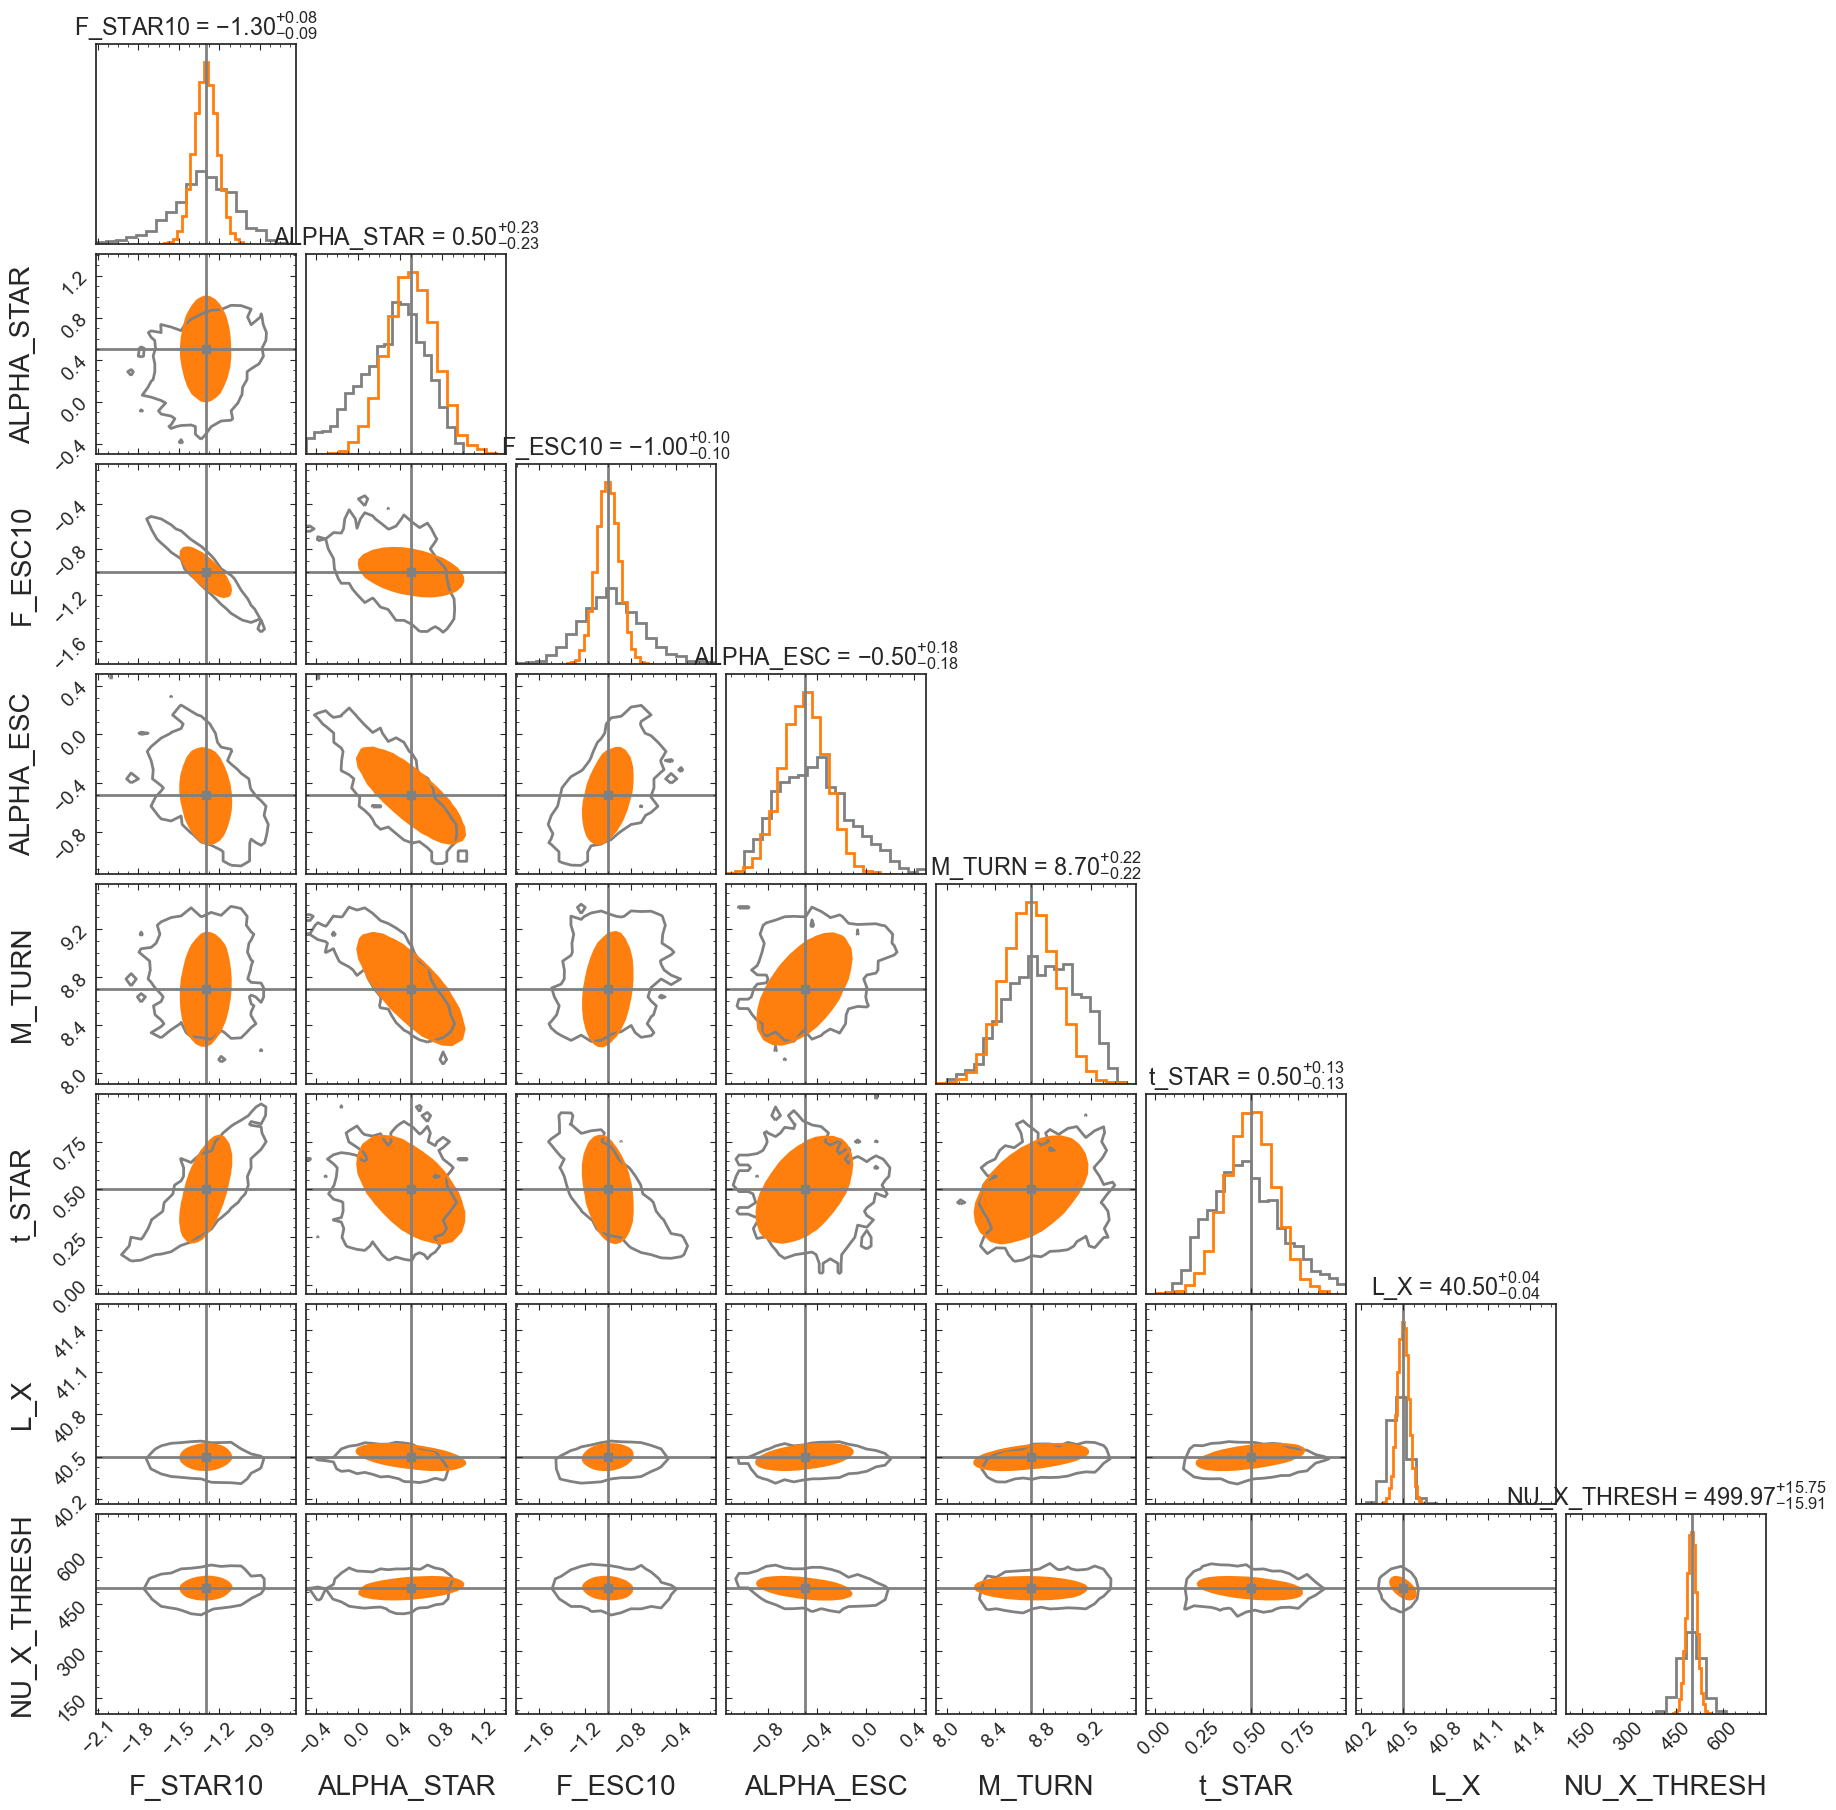

In [13]:
Park19_chains = np.load(f'{output_dir_Park19}Park19_chains.npz')
print(Park19_chains['params'])

mean = fid_params_Park19.copy()
cov  = Finv_PS_Park19.copy()
fisher_chain = np.random.multivariate_normal(mean, cov, size=10000)

labels = astro_params_vary_Park19
levels = 1.0 - np.exp(-0.5 * np.array([2,]) ** 2)

fig = corner.corner(Park19_chains['chains'],                  
            labels=labels,
            smooth=None,
            color='0.5', use_math_text=True,
            plot_datapoints=False, plot_density=False, fill_contours=False,
            hist_kwargs = {'lw':2,'density':True},
            levels=levels,
#             range=[1,1,1,1,1,1,(40.,41.),(300,700)],
            show_titles=True,
            truths=mean, truth_color='0.5',
            fig_kwargs={'figsize':(10,10)});

corner.corner(fisher_chain, fig=fig,
                labels=labels,
                smooth=1,
                color='tab:orange', use_math_text=True,
                plot_datapoints=False, plot_density=False, fill_contours=True,
                hist_kwargs = {'lw':2,'density':True},
                levels=levels,
                show_titles=True, 
                label_kwargs={"fontsize": 20},
                );
plt.savefig(data_dir+'examples/corner_Park19_fisher_compare.png', bbox_inches='tight')